In [15]:
import numpy as np 
import pandas as pd 

df = pd.read_csv("/Users/georgesantellano/Documents/2025 Pew Research Center Opinion Poll Analysis/NPORS_2025_for_public_release_FINAL.csv")

In [16]:
#Removing columns with corrupted data from .sav file to .csv
df.drop(['LANGUAGEINITIAL', 'PARTYLN', 'VOTEGEN_POST'], inplace = True, axis = 1)

# Feature Analysis

In [17]:
count_demo = df['COMTYPE2'].value_counts().reset_index()
count_demo.columns = ['CommunityType', 'Count']

count_edu = df['EDUCCAT'].value_counts().reset_index()
count_edu.columns = ['EducationLevel', 'Count']

count_party = df['PARTY'].value_counts().reset_index()
count_party.columns = ['Party', 'Count']

count_age = df['AGECAT'].value_counts().reset_index()
count_age.columns = ['AgeCategory', 'Count']

count_income = df['INC_SDT1'].value_counts().reset_index()
count_income.columns = ['IncomeBracket', 'Count']

count_gender = df['GENDER'].value_counts().reset_index()
count_gender.columns = ['Gender', 'Count']

count_econT = df.ECON1MOD.value_counts().reset_index()
count_econT.columns = ['EconToday', 'Count']

count_econO = df.ECON1BMOD.value_counts().reset_index()
count_econO.columns = ['EconOutlook', 'Count']

The data comes numerically encoded so will map to categories for visualizations.

In [18]:
import matplotlib.pyplot as plt 
import seaborn as sbn 

#Look-up dictionaries
community_map = {
    1: 'Urban',
    2:	'Suburban',
    3:	'Rural',
    99:	'Refused/Web blank'
}

education_map = {
    1: 'College graduate+',
    2: 'Some College',
    3: 'H.S. graduate or less',
    99:'Refused'
}

party_map = {
    1: 'Republican',
    2: 'Democrat',
    3: 'Independent',
    4: 'Other',
    99: 'Refused'
}

income_map = {
    1:	'< 30k',
    2:	'[30k,40k)',
    3:	'[40k,50k)',
    4:	 '[50k,70k)',
    5:	'[70k,100k)',
    6:	'[100k, 125k)',
    7:	'[125k, 150k)',
    8:	'150k+',
    99:	'Refused/Web blank'
}
age_map = {
    1:	'18-29',
    2:	'30-49',
    3:	'50-64',
    4:	'65+',
    99:	'Refused'
}

gender_map = {
    1:	'A man',
    2:	'A woman',
    3:	'Other',
    99:	'Refused'
}
econP_map = {
    1: 'Excellent',
    2: 'Good',
    3: 'Only fair',
    4: 'Poor',
    99:	'Refused/Web blank'
}

econO_map = {
    1: 'Better',
    2: 'Worse',
    3: 'About the same',
    99: 'Refused/Web blank'
}
#Map by look-up table
count_income['IncomeBracket'] = count_income['IncomeBracket'].replace(income_map)
count_age['AgeCategory'] = count_age['AgeCategory'].replace(age_map)
count_gender['Gender'] = count_gender['Gender'].replace(gender_map)
count_party['Party'] = count_party['Party'].replace(party_map)
count_edu['EducationLevel'] = count_edu['EducationLevel'].replace(education_map)
count_demo['CommunityType'] = count_demo['CommunityType'].replace(community_map)

## Responder Demographics

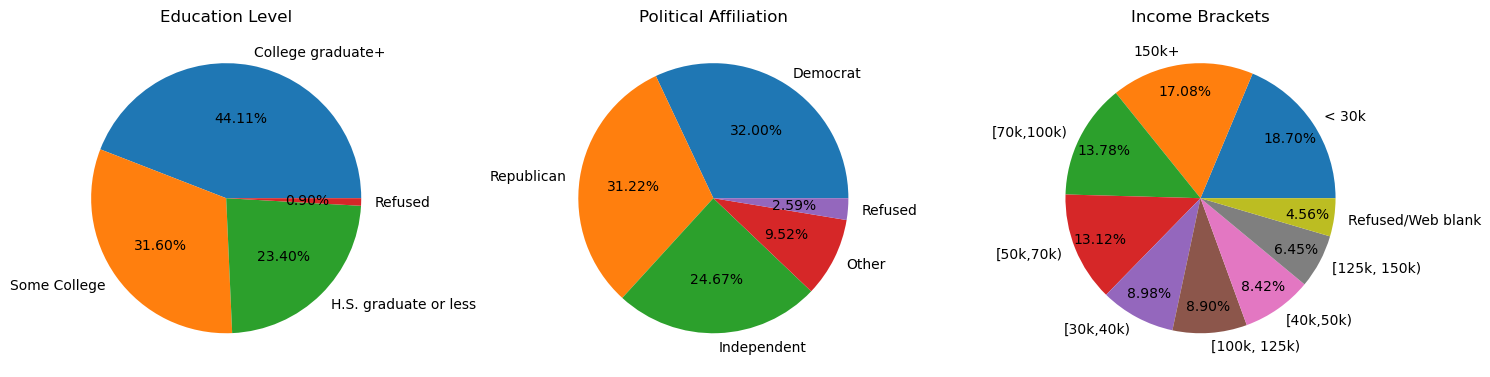

In [19]:
#Visualize via pie charts
fig, ax = plt.subplots(1,3, figsize = (15,6))

#ax[0][0].pie(x = count_demo.Count, labels = count_demo.CommunityType, autopct = '%.2f%%')
#ax[0][0].set_title('Urbanicity')

ax[0].pie(x = count_edu.Count, labels = count_edu.EducationLevel, autopct = '%.2f%%')
ax[0].set_title('Education Level')

ax[1].pie(x = count_party.Count, labels = count_party.Party, autopct = '%.2f%%')
ax[1].set_title('Political Affiliation') 

ax[2].pie(x = count_income.Count, labels = count_income.IncomeBracket, autopct = '%.2f%%', pctdistance=0.8)
ax[2].set_title('Income Brackets')

#ax[1][1].pie(x = count_age.Count, labels = count_age.AgeCategory , autopct = '%.2f%%')
#ax[1][1].set_title('Age Brackets')

#ax[2].pie(x = count_gender.Count, labels = count_gender.Gender, pctdistance=.7, explode = [0,0,.1,0],textprops={'size': 'smaller'} , autopct = '%.2f%%')
#ax[2].set_title('Identifying Gender')

plt.tight_layout()

## Correlation Investigation

In [20]:
#Again, need to map over encoded values for tables we want. 
partyid_map = {
    1:	'Republican',
    2:	'Democrat',
    3:	'Independent',
    4:	'Something else',
    99:	'Refused/Web blank'
}

data = df.copy()
data['PARTY'] = data['PARTY'].map(partyid_map)
data['ECON1BMOD'] = data['ECON1BMOD'].map(econO_map)
data['ECON1MOD'] = data['ECON1MOD'].map(econP_map)

Text(0.5, 0, 'Opinion')

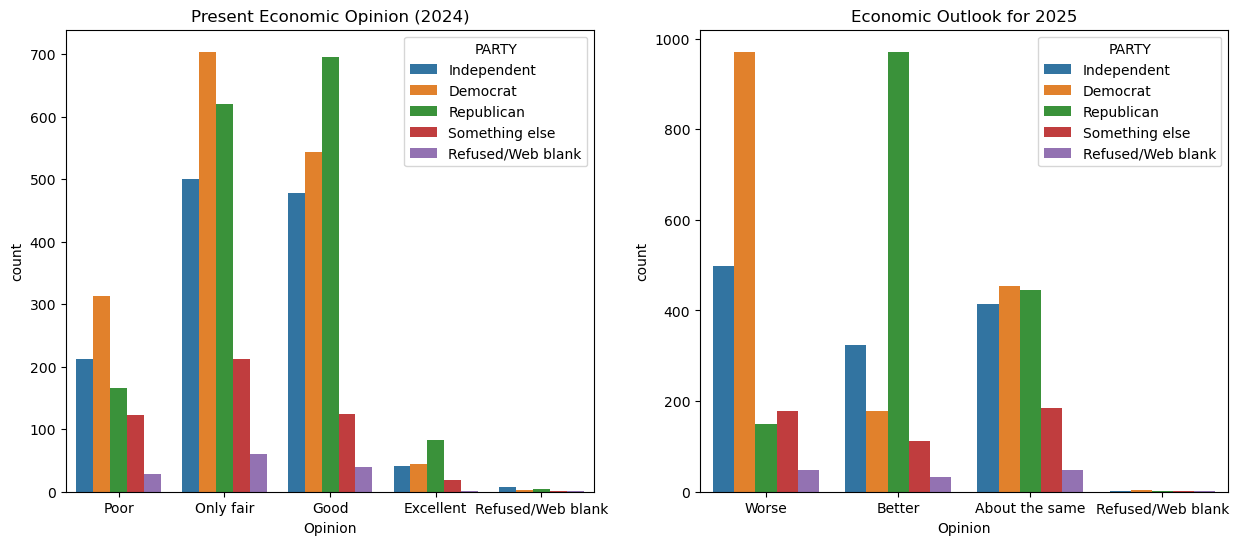

In [21]:
fig, ax = plt.subplots(1,2, figsize = (15,6))

sbn.countplot(data, x = data.ECON1MOD, hue = data.PARTY, ax = ax[0]).set_title('Present Economic Opinion (2024)')
ax[0].set_xlabel('Opinion')

sbn.countplot(data, x = data.ECON1BMOD, hue = data.PARTY , ax = ax[1]).set_title('Economic Outlook for 2025')
ax[1].set_xlabel('Opinion')

In [22]:
# I would like to compare some more columns so preparing that data to pass to crosstabs

In [23]:
finsit_map = {
    1: 'Live comfortably',
    2: 'Meet my basic expenses with a little left over for extras',
    3: 'Just meet my basic expenses',
    4: "Don't even have enough to meet basic expenses",
    99:	'Refused/Web blank'
}

crimesafe_map = {
    1:'Extremely safe',
    2: 'Very safe',
    3: 'Somewhat safe',
    4: 'Not too safe',
    5: 'Not at all safe',
    99:'Refused/Web blank'
}

moregun_map = {
    1: 'More crime',
    2: 'Less crime',
    3: 'No difference',
    99:'Refused/Web blank'
} 

vet_map = {
    1: 'Yes, self',
    2: 'Yes, someone else in household',
    3: 'Yes, both myself and someone else',
    4: 'No, nobody in household',
    99:'Refused/Web blank'
}

data['FIN_SIT'] = data['FIN_SIT'].map(finsit_map)
data['CRIMESAFE']= data['CRIMESAFE'].map(crimesafe_map)
data['MOREGUNIMPACT']= data['MOREGUNIMPACT'].map(moregun_map)
data['VET1'] = data['VET1'].map(vet_map)

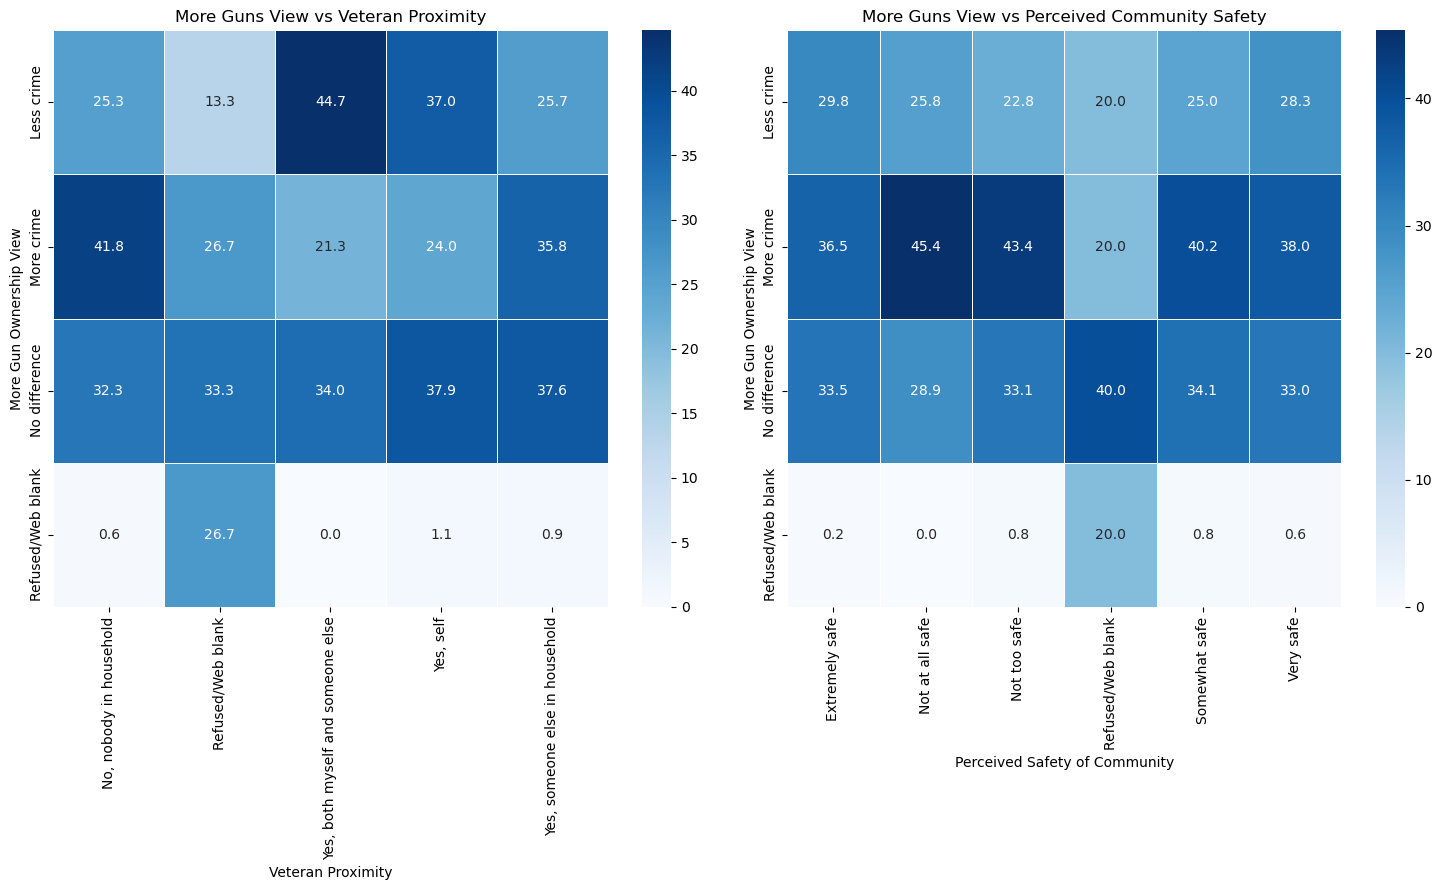

In [24]:
cth = pd.crosstab(data["MOREGUNIMPACT"], data["CRIMESAFE"])
cth_pct_cols = cth.div(cth.sum(axis=0), axis=1) * 100 

ct = pd.crosstab(data['MOREGUNIMPACT'], data['VET1'])
ct_pct_cols = ct.div(ct.sum(axis=0), axis=1) * 100

fig, axes = plt.subplots(1, 2, figsize=(15, 9))

sbn.heatmap(cth_pct_cols, annot=True, fmt=".1f", cmap="Blues", linewidths=.5, ax=axes[1]
)
axes[1].set_title("More Guns View vs Perceived Community Safety")
axes[1].set_ylabel("More Gun Ownership View")
axes[1].set_xlabel("Perceived Safety of Community")

sbn.heatmap(ct_pct_cols, annot=True, fmt=".1f", cmap="Blues",linewidths=.5, ax=axes[0])
axes[0].set_title("More Guns View vs Veteran Proximity")
axes[0].set_xlabel("Veteran Proximity")
axes[0].set_ylabel("More Gun Ownership View")

plt.tight_layout()
plt.show()

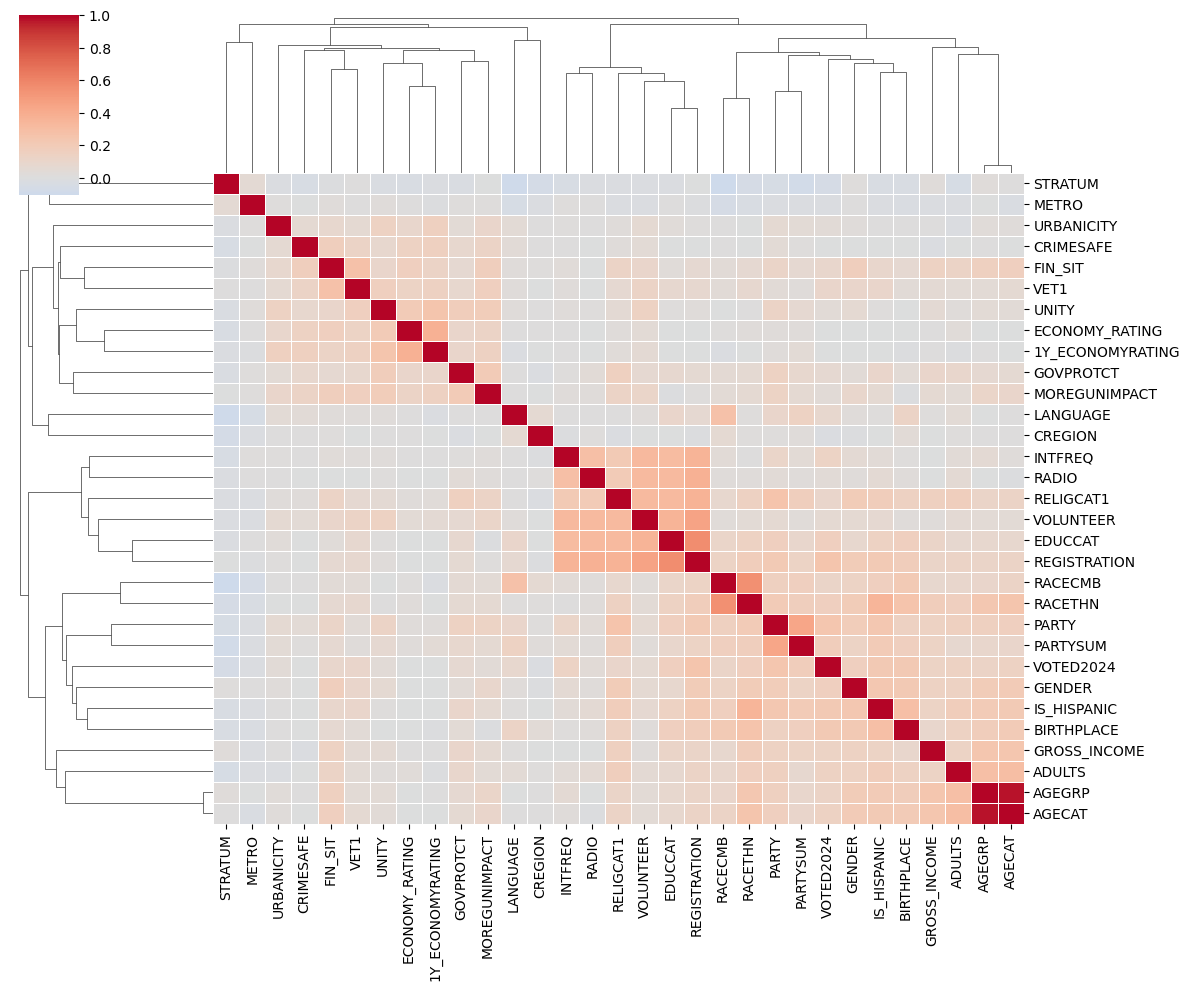

In [25]:
#Making a copy and relabeling columns for readability
dt = df.copy()

dt.drop(['RESPID','INTERVIEW_START','WEIGHT','MODE','INTERVIEW_END','BASEWT','NHISLL','INTFREQ_COLLAPSED'],inplace = True, axis = 1)

dt = dt.rename(columns={
    "ECON1MOD": "ECONOMY_RATING",
    "ECON1BMOD": "1Y_ECONOMYRATING",
    "COMTYPE2": "URBANICITY",
    "VOL12_CPS": "VOLUNTEER",
    "INC_SDT1": "GROSS_INCOME",
    "HISP": "IS_HISPANIC"
})


corr = dt.corr(numeric_only=True)

sbn.clustermap(
    corr,
    cmap="coolwarm",
    center=0,
    linewidths=.5,
    figsize=(12,10)
)

plt.show()
#We'll get an error below because our columns have very small cardinality so
#all the inbetween values should return Nans in calculatating corr.

Observation: There is a slight correlation between:

* how often you are on the internet
* radio listener?
* volunteering in the past year
* education level
* up-to-date voter registration?
* religious affiliation

# Data Processing

The data is already encoded and at this point and is ready for a test train split. Our target variable is political party. 

In [26]:
# We will try to predict political party, so we'll need to remove PARTYSUM as it gives 'left-lean' vs 'right-lean' and hence leakage.
#Indeed, without removal we get a 100% classification accuracy. 

dt.drop(['PARTYSUM'],axis = 1, inplace = True)
dt.columns

Index(['LANGUAGE', 'STRATUM', 'ECONOMY_RATING', '1Y_ECONOMYRATING',
       'URBANICITY', 'UNITY', 'CRIMESAFE', 'GOVPROTCT', 'MOREGUNIMPACT',
       'FIN_SIT', 'VET1', 'VOLUNTEER', 'INTFREQ', 'RADIO', 'RELIGCAT1',
       'EDUCCAT', 'REGISTRATION', 'PARTY', 'IS_HISPANIC', 'RACECMB', 'RACETHN',
       'AGEGRP', 'AGECAT', 'BIRTHPLACE', 'GENDER', 'ADULTS', 'VOTED2024',
       'GROSS_INCOME', 'CREGION', 'METRO'],
      dtype='object')

In [27]:
#After running the model a few times to predict for target variable PARTY, 
# The refused/blank response affected our models negatively, so removing that as
#its unneccessary 

dt = dt[~dt['PARTY'].isin([4,99])]

y = dt.PARTY

x = dt.drop(['PARTY'],axis = 1, inplace = False)

In [28]:
#Now we split the data 
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x,y, train_size = .8, test_size = .2, random_state = 0)

# Model Fitting

## Random Forest Classifier

In [33]:
# We'll start with a RandomForestClassifier and to finetune our parameters, 
#we'll use a GridSearchCV. What this does is it tries each combination of the 
#param_grid paramters i've sent and finds the best combination for accuracy. 

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

RFC = RandomForestClassifier(random_state = 0)

param_grid = {'n_estimators': list(range(1,5,1)),
              'max_depth': [None, 5,10,15],
              'min_samples_split': [2,5],
              'min_samples_leaf':[1,2,4]
             }
grid_search = GridSearchCV(estimator = RFC,
                           param_grid = param_grid,
                           cv = 5, 
                           scoring = 'accuracy',
                           n_jobs = 1,
                           verbose = 0
)
grid_search.fit(x_train,y_train)

best_estimator = grid_search.best_estimator_
pred = best_estimator.predict(x_val)

print("Best Parameters:", grid_search.best_params_)
print("Best Cross Validation Accuracy:", grid_search.best_score_)
print("Validation Set Accuracy:",grid_search.score(x_val,y_val))

Best Parameters: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 3}
Best Cross Validation Accuracy: 0.6253150406096862
Validation Set Accuracy: 0.6319365798414496


In [31]:
#Now lets look at the confusion matrix and some more detail on prediction accuracy per 
#sample and total
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

print(confusion_matrix(pred,y_val))
print(classification_report(y_val, pred))

#Not that we've trained our model, its important to consider which features had higher weights
#i.e. that have a stronger correlation with our target variable. 
importances1 = best_estimator.feature_importances_
feature_importances1 = pd.Series(importances1, x_train.columns)
feature_importances1 = feature_importances1.sort_values(ascending = False)
fi = feature_importances1[feature_importances1 != 0]
print(fi)


[[229  32  81]
 [ 54 278 107]
 [ 22  29  51]]
              precision    recall  f1-score   support

           1       0.67      0.75      0.71       305
           2       0.63      0.82      0.71       339
           3       0.50      0.21      0.30       239

    accuracy                           0.63       883
   macro avg       0.60      0.59      0.57       883
weighted avg       0.61      0.63      0.60       883

1Y_ECONOMYRATING    0.442734
MOREGUNIMPACT       0.150710
RACETHN             0.147471
RELIGCAT1           0.078653
VOTED2024           0.039627
GOVPROTCT           0.026341
UNITY               0.018032
CRIMESAFE           0.018024
INTFREQ             0.014424
STRATUM             0.012595
GROSS_INCOME        0.008833
EDUCCAT             0.005431
FIN_SIT             0.005095
URBANICITY          0.004736
IS_HISPANIC         0.004557
ECONOMY_RATING      0.004217
RACECMB             0.003852
GENDER              0.003296
METRO               0.003233
REGISTRATION        0.

Observations:
Recall 1: Republican, 2: Democrat, 3: Independent. 

It appears this model overall is better than chance but still not great. An issue is that
this model is not picking up patterns to predict independents. That brings down the overall precision. 
For political opinion polls, a very good precision is .70-.75. 

Looking at the confusion matrix, its clear independents share characteristics with democrats and republicans. This makes it hard for the model to pick out patterns for classifying independents.  The model does very differentiating between republicans and democrats. The accuracy is brought down mostly by republicans and democrats incorrectly being classified as indpendents. 

We note the 1 year economic outlook was a very important feature for this model. The other features are far behind in importance. After reviewing the tables above, all together, this adds support to the notion that Republicans believe the president at the time of this poll (Jan-June 2025) Trump, would be good for the economy. So much so in fact, that it seems thinking Trump is good for the economy + opinons on if guns make communities safer + racial ethinicity, gets you a pretty solid prediction of whether someone is a Republican.

## KNeighbors Classifier

In [41]:
from sklearn.neighbors import KNeighborsClassifier

KNC = KNeighborsClassifier()

#weights = auto and metric = euclidean are fine, lets optimize number estimators parameter. 

param_grid = {'n_neighbors': list(range(1,5,1)), 
             }
grid_search = GridSearchCV(estimator = KNC,
                           param_grid = param_grid,
                           cv = 5, 
                           scoring = 'accuracy',
                           n_jobs = 1,
                           verbose = 0
)

grid_search.fit(x_train,y_train)
best_estimator = grid_search.best_estimator_
pred = best_estimator.predict(x_val)

print("Best Parameters:", grid_search.best_params_)
print("Best Cross Validation Accuracy:", grid_search.best_score_)
print("Validation Set Accuracy:",grid_search.score(x_val,y_val))

Best Parameters: {'n_neighbors': 4}
Best Cross Validation Accuracy: 0.4975938710827781
Validation Set Accuracy: 0.5141562853907135


In [42]:
print(confusion_matrix(pred,y_val))
print(classification_report(y_val, pred))

[[186  66  97]
 [ 76 227 101]
 [ 43  46  41]]
              precision    recall  f1-score   support

           1       0.53      0.61      0.57       305
           2       0.56      0.67      0.61       339
           3       0.32      0.17      0.22       239

    accuracy                           0.51       883
   macro avg       0.47      0.48      0.47       883
weighted avg       0.49      0.51      0.49       883



The K neighbors classifier had a harder time picking out patterns. It did just about chance. 

## AdaBoost Classifier

In [38]:
from sklearn.ensemble import AdaBoostClassifier

ABC = AdaBoostClassifier()

param_grid = {'n_estimators' : list(range(1,5,1)),
              'learning_rate': [1,2,5]    
    
}

grid_search = GridSearchCV(estimator = ABC, 
                           param_grid = param_grid,
                           cv = 5, 
                           scoring = 'accuracy',
                           n_jobs = 1,
                           verbose = 0
)

grid_search.fit(x_train,y_train)

best_estimator = grid_search.best_estimator_
pred = best_estimator.predict(x_val)

print("Best Parameters:", grid_search.best_params_)
print("Best Cross Validation Accuracy:", grid_search.best_score_)
print("Validation Set Accuracy:",grid_search.score(x_val,y_val))

Best Parameters: {'learning_rate': 1, 'n_estimators': 4}
Best Cross Validation Accuracy: 0.5766062563358724
Validation Set Accuracy: 0.594563986409966


In [39]:
print(confusion_matrix(pred,y_val))
print(classification_report(y_val, pred))

importances3 = best_estimator.feature_importances_
feature_importances3 = pd.Series(importances3, x_train.columns)
feature_importances3 = feature_importances3.sort_values(ascending = False)
fi = feature_importances3[feature_importances3 != 0]
print(fi)

[[256  67 128]
 [ 37 266 108]
 [ 12   6   3]]
              precision    recall  f1-score   support

           1       0.57      0.84      0.68       305
           2       0.65      0.78      0.71       339
           3       0.14      0.01      0.02       239

    accuracy                           0.59       883
   macro avg       0.45      0.55      0.47       883
weighted avg       0.48      0.59      0.51       883

1Y_ECONOMYRATING    0.481767
MOREGUNIMPACT       0.370769
RACETHN             0.147464
dtype: float64


Our AdaBoost classifier did better distinguishing between Republicans and Democrats, however the independent category really affected the model. It clearly did a worse job picking out any patterns for the independent class. 

The features with most importance were 1 year economic outlook, opinon on more guns and community safety, and racial ethnicity. This model did not find patterns with the other variables. 

# Conclusions

Overall, opinion data is tricky to work with as answers are subjective by nature and can be influenced by exterior factors like comfortability with interviewer. For example, the language options were limited to English and Spanish. This could lead to respondents communicating and interpreting a language they are not the most comfortable in, which could mean their true opinions are not captured.

Independents were hard to classify and that makes sense thinking about how people who don't "fit in a box" usually identify as such. We were able to pick up some pretty good patterns to classify Republicans and Democrats. Surprising to me at least, however, was the importance of one-year economic outlook. That really reverberates with me since today (5–10 months after these responses were taken), the economy seems to be not good. This raises many questions about whether Republicans are having to adjust their expectations for Trump, and whether many are disappointed.